# Project: Medical Appointment No Shows (Why do 30% of patients miss their schedules appointments?)
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset "No-show appointment" is a dataset of records on "whether a patient shows up for a hospital appointment in Brasil" and the 14 variables that may impact the "show/no-show".
The dataset is analyzed in order to get the most "influential" variables that impact the "no show". With the "variables" results, the healthcare service can take right action to enhance the "positively-correlated" show-up factors and mitigate the "no show" risk.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#

### Structure and plan to include the "variables" in the analysis
Among the 14 fields, 7 fields are boolean values ("Scholarship",	"Hipertension",	"Diabetes",	"Alcoholism",	"Handcap",	"SMS_received",	"No-show"), and they will be kept as boolean for futher analysis.

For the other 7 fields:
1. "Patientid" & "AppointmentID" are kept to check if some patients have a pattern of "show"  and " no show" ;
2. "Age" and "Gender" are kept further analysis of correlation with "show/no show";
3. "Schedule day" and "Appointment day"  are kept to analyse :if which day of the week/which month has an impact on the "show/no show"; if the difference between "schedule" and "appointment" impacts the result;
4. "Region" is kept to analyze if some regions have a higher rate of "no show".


### Check-list of data completeness, correctness, type & Action
1. PatientId and AppointmentID > Complete; Will be converted to "string" as they have no actual numerical meaning;
2. Gender > Complete; Will be converted to "boolean" (M=1,F=0) to facilitate the further analysis;	
3. ScheduledDay	& AppointmentDay > Complete; Will be converted to "date" format to facilitate the further analysis;
4. Age > Complete; But there are negative values, and the negative values seem errors; Then, if the negative value isn't representing a high percentage of the dataset, they are deleted; if high, negative values will be replaced by "Average age" of the whole dataset;	
5. Neighbourhood > Complete; Stay as string 	
6. Scholarship	Hipertension	Diabetes	Alcoholism	Handcap	SMS_received	No-show > Complete; Stay as Boolean

In [6]:
# Transform the data
# Change the data types
df.PatientId=df.PatientId.astype(str)
df.AppointmentID=df.AppointmentID.astype(str)
df.ScheduledDay=pd.to_datetime(df.ScheduledDay)
df.AppointmentDay=pd.to_datetime(df.AppointmentDay)

# Change "gender" to boolean
df['Gender'] = df['Gender'].apply({'M':1, 'F':0}.get)

# Check how many negative age values, and replace negative age values with average if applicable
Negative_age_row_quantity=sum(df.Age<0)
# As there is only 1 row with negative age, the row is deleted.
df=df[df.Age>=0]

# Convert "No-show" to bolean
df['No-show']=np.where(df['No-show']=="No",0,1)

# Check the results after data transformation
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  object             
 1   AppointmentID   110526 non-null  object             
 2   Gender          110526 non-null  int64              
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

<a id='eda'></a>
## Exploratory Data Analysis



In [7]:
# Investigate if there is a 'no show' difference between genders
male_appointment=df[df['Gender']==1]
male_appointment_quantity=male_appointment.AppointmentID.count()
male_appointment_no_show_rate="{:.2%}".format(male_appointment['No-show'].sum()/male_appointment_quantity)
print('Male appointment no show rate is: {}.'.format(male_appointment_no_show_rate))

female_appointment=df[df['Gender']==0]
female_appointment_quantity=female_appointment.AppointmentID.count()
female_appointment_no_show_rate="{:.2%}".format(female_appointment['No-show'].sum()/female_appointment_quantity)
print('Female appointment no show rate is: {}.'.format(female_appointment_no_show_rate))

print('From the numbers, it is noted that females are slightly higher in the no-show than male')

Male appointment no show rate is: 19.97%.
Female appointment no show rate is: 20.31%.
From the numbers, it is noted that females are slightly higher in the no-show than male


### Check the boolean variables and their respective impact on 'no-show'

In [8]:


def boolean_check(list):
    for v in list:
        app_1=df[df[v]==1]
        app_quantity_1=app_1.AppointmentID.count()
        appointment_1_no_show_rate="{:.2%}".format(app_1['No-show'].sum()/app_quantity_1)
        app_0=df[df[v]==0]
        app_quantity_0=app_0.AppointmentID.count()
        appointment_0_no_show_rate="{:.2%}".format(app_0['No-show'].sum()/app_quantity_0)
        print('Positive {} appointment no show rate is: {}, and negative {} appointment no show rate is:{}'.format(v,appointment_1_no_show_rate,v,appointment_0_no_show_rate))

list_boolean=['Gender','Scholarship',	'Hipertension',	'Diabetes',	'Alcoholism',	'Handcap',	'SMS_received']

boolean_check(list_boolean)

Positive Gender appointment no show rate is: 19.97%, and negative Gender appointment no show rate is:20.31%
Positive Scholarship appointment no show rate is: 23.74%, and negative Scholarship appointment no show rate is:19.81%
Positive Hipertension appointment no show rate is: 17.30%, and negative Hipertension appointment no show rate is:20.90%
Positive Diabetes appointment no show rate is: 18.00%, and negative Diabetes appointment no show rate is:20.36%
Positive Alcoholism appointment no show rate is: 20.15%, and negative Alcoholism appointment no show rate is:20.19%
Positive Handcap appointment no show rate is: 17.92%, and negative Handcap appointment no show rate is:20.24%
Positive SMS_received appointment no show rate is: 27.57%, and negative SMS_received appointment no show rate is:16.70%


From the boolean impact, we can see that the variables have a different no-show rate.

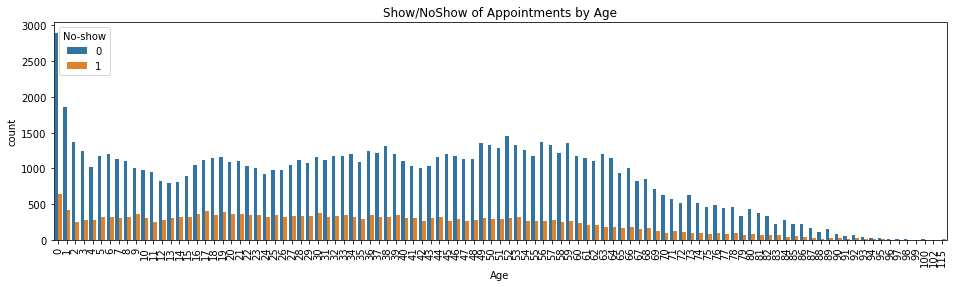

In [9]:
# Explore the no show rate by age
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age, hue=df['No-show'])
ax.set_title("Show/NoShow of Appointments by Age")
plt.show()


From the chart, there isn't a big difference between different ages in terms of no show.

In [10]:
# Check if certain regions are higher in no show
Neighbourhood_list=df['Neighbourhood'].unique().tolist()
Neighbourhood_list

for n in Neighbourhood_list:
    app_neighbourhood=df[df['Neighbourhood']==n]
    app_quantity_neighbourhood=app_neighbourhood.AppointmentID.count()
    appointment_neighbourhood_no_show_rate="{:.2%}".format(app_neighbourhood['No-show'].sum()/app_quantity_neighbourhood)
    

print("It doesn't add too much value to consider the neighbourhood")

It doesn't add too much value to consider the neighbourhood


From the no show rate of different weekdays, it is found that Saturday has the highest no show rate.

In [11]:
# Add a column of day of week to do further analysis
df['Day of week']=df['AppointmentDay'].dt.weekday


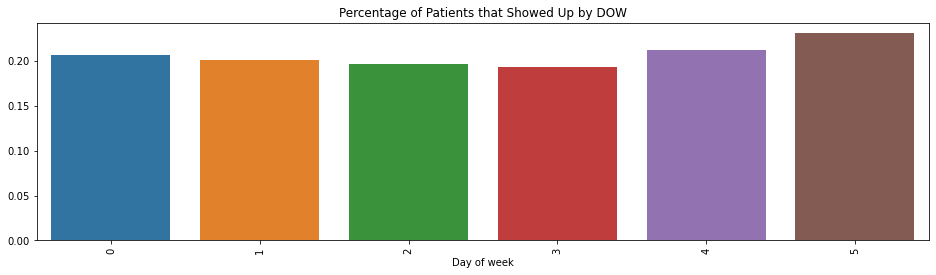

In [12]:

# Explore if there is a relationship between no show rate by the day of the week
df_dow_ratio = df[df['No-show'] == 1].groupby(['Day of week']).size()/df.groupby(['Day of week']).size()

plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.barplot(x=df_dow_ratio.index, y=df_dow_ratio)
ax.set_title("Percentage of Patients that Showed Up by DOW")
plt.show()

In [13]:
# Check the difference between "schedule" and "appointment" and no show rate impact
df['day_dif']=(df['AppointmentDay'].dt.round("D"))-(df['ScheduledDay'].dt.round("D"))


In [14]:

df['day_dif'].describe()
df['day_dif']=df['day_dif'].astype(str).str.split(' ').str[0]

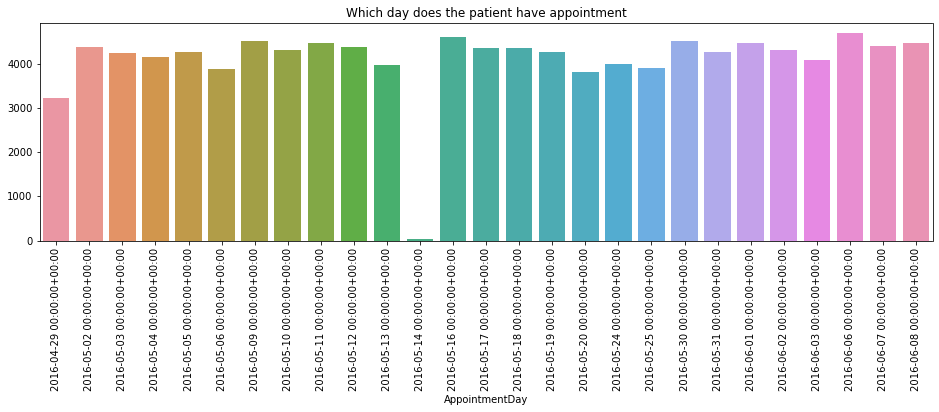

In [20]:
# Explore the distribution of the appointments by DOW
df['ScheduledDay']=pd.to_datetime(df['AppointmentDay']).dt.date
df_dow_app = df.groupby(['AppointmentDay']).size()

plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.barplot(x=df_dow_app.index, y=df_dow_app)
ax.set_title("Which day does the patient have appointment")
plt.show()

In [ ]:
# Drop the columns that are not very relevant
df.drop(['PatientId','AppointmentID','ScheduledDay',	'AppointmentDay','Neighbourhood'],axis=1,inplace=True)


In [ ]:
df['day_dif']=df['day_dif'].astype(str)
df['day_dif']=df['day_dif'].astype(int)
df.describe()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day of week,day_dif
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,0.350026,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.201934,1.858260,9.803386
std,0.476980,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445,1.371667,15.238548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000
75%,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,14.000000
max,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,5.000000,179.000000


In [ ]:
# Get the Dependent and Independent Features.
X = df.drop(['No-show'], axis=1)
y = df['No-show']

In [ ]:
X

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Day of week,day_dif
0,0,62,0,1,0,0,0,0,4,-1
1,1,56,0,0,0,0,0,0,4,-1
2,0,62,0,0,0,0,0,0,4,-1
3,0,8,0,0,0,0,0,0,4,-1
4,0,56,0,1,1,0,0,0,4,-1
...,...,...,...,...,...,...,...,...,...,...
110522,0,56,0,0,0,0,0,1,1,35
110523,0,51,0,0,0,0,0,1,1,35
110524,0,21,0,0,0,0,0,1,1,40
110525,0,38,0,0,0,0,0,1,1,40


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)


In [ ]:
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
print("Feature Importance:\n")
for name, importance in zip(X.columns, np.sort(dt_clf.feature_importances_)[::-1]):
    print("{} -- {:.2f}".format(name, importance))

Feature Importance:

Gender -- 0.39
Age -- 0.29
Scholarship -- 0.15
Hipertension -- 0.05
Diabetes -- 0.03
Alcoholism -- 0.03
Handcap -- 0.02
SMS_received -- 0.02
Day of week -- 0.01
day_dif -- 0.01


In [ ]:
dt_clf.score(X_test, y_test)


0.7500959587651478

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[10,20], 'max_depth':[None, 5], 'min_samples_split':[2,3]}
rf_clf = RandomForestClassifier(random_state=0)
clf_grid = GridSearchCV(rf_clf, params, cv=5, n_jobs=-1, verbose=1)
clf_grid.fit(X, y)
print(clf_grid.best_params_)
print(clf_grid.best_score_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 10}
0.7980656135365387


# Limitation

The current dataset is limited in the timespan (2016/04/29 to 2016/6/8), and with limited data, it is hard to find the correlation of the patient behaviour (chrononic patient VS occasional patient) with the appoinment missing; it is hard to find if there is a seasonability in the no show.


<a id='conclusions'></a>
## Conclusions

From the above feature importance, we could see that Gender, Age,  Scholarship are some of the top features that would help us determine if the patient who has taken an appointment will Show/NoShow.